# Block construction agent plots from experiment runner dataframe

In [24]:
#Don't think we need this
!cd /Users/felixbinder/Cloud/Grad\ School/Fan\ Lab/Projection/projection_block_construction/projection_agent

In [25]:
# set the path for the experiment files
import sys
sys.path.insert(0, '/Users/felixbinder/Cloud/Grad School/Fan Lab/Projection/projection_block_construction/projection_agent')

In [1]:
import blockworld as bw
import blockworld_library as bl

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
class State():
    """A dummy state to pass to blockworld scoring functions"""
    def __init__(self,world,blockmap):
        self.block_map = blockmap
        self.world = world

In [5]:
#initializing worlds (used for scoring re a certain silhuoette)
silhouettes = {i : bl.load_interesting_structure(i) for i in [14,15,5,8,12,1]}
worlds_silhouettes = {'int_struct_'+str(i) : bw.Blockworld(silhouette=s,block_library=bl.bl_silhouette2_default) for i,s in silhouettes.items()}
worlds_small = {
    'stonehenge_6_4' : bw.Blockworld(silhouette=bl.stonehenge_6_4,block_library=bl.bl_stonehenge_6_4),
    'stonehenge_3_3' : bw.Blockworld(silhouette=bl.stonehenge_3_3,block_library=bl.bl_stonehenge_3_3),
    'block' : bw.Blockworld(silhouette=bl.block,block_library=bl.bl_stonehenge_3_3),
    'T' : bw.Blockworld(silhouette=bl.T,block_library=bl.bl_stonehenge_6_4),
    'side_by_side' : bw.Blockworld(silhouette=bl.side_by_side,block_library=bl.bl_stonehenge_6_4),
}
bw_worlds = {**worlds_silhouettes,**worlds_small}

Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (8, 8) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (6, 4) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (3, 3) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (4, 4) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (4, 4) don't match world dimensions. Setting world dimensions to match.
Silhouette dimensions (4, 9) don't match world dimensions. S

Let's read the dataframes:

In [8]:
dfs = ['breadth_to_3.pkl',
       'breadth_4.pkl',
       'MCTS.pkl']

This expects the .pkls in `projection_block_construction`

In [9]:
#load all experiments as one dataframe
df = pd.concat([pd.read_pickle('../'+l) for l in dfs])

In [10]:
display(df)

,agent,world,outcome,run
0,type: Agent scoring: random_scoring horizon: 1...,"int_struct_14|Type: Blockworld dimension: (8, ...",Fail,b...
1,type: Agent scoring: random_scoring horizon: 1...,"int_struct_15|Type: Blockworld dimension: (8, ...",Fail,b...
2,type: Agent scoring: random_scoring horizon: 1...,"int_struct_5|Type: Blockworld dimension: (8, 8...",Fail,b...
3,type: Agent scoring: random_scoring horizon: 1...,"int_struct_8|Type: Blockworld dimension: (8, 8...",Fail,b...
4,type: Agent scoring: random_scoring horizon: 1...,"int_struct_12|Type: Blockworld dimension: (8, ...",Fail,b...
...,...,...,...,...
193,type: MCTS_Agent horizon: 100000,"stonehenge_6_4|Type: Blockworld dimension: (6,...",Win,b...
194,type: MCTS_Agent horizon: 100000,"stonehenge_3_3|Type: Blockworld dimension: (3,...",Win,blockmap \ 0 ...
195,type: MCTS_Agent horizon: 100000,"block|Type: Blockworld dimension: (4, 4) silho...",Win,b...
196,type: MCTS_Agent horizon: 100000,"T|Type: Blockworld dimension: (4, 4) silhouett...",Ongoing,b...


In [ ]:
#CAREFUL
#view entire dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

In [11]:
agents = df['agent'].unique()

In [12]:
worlds = df['world'].unique()
worlds_index = list(set([w.split('|')[0] for w in worlds]))

In [13]:
#🐘
elephant = 'int_struct_15'
stonehenge = 'stonehenge_6_4'

In [14]:
agents

array(['type: Agent scoring: random_scoring horizon: 1 scoring: Final state sparse?: False',
       'type: Agent scoring: F1score horizon: 1 scoring: Final state sparse?: False',
       'type: Agent scoring: F1score horizon: 2 scoring: Final state sparse?: False',
       'type: Agent scoring: F1score horizon: 3 scoring: Final state sparse?: False',
       'type: Agent scoring: silhouette_hole_score horizon: 1 scoring: Final state sparse?: False',
       'type: Agent scoring: silhouette_hole_score horizon: 2 scoring: Final state sparse?: False',
       'type: Agent scoring: silhouette_hole_score horizon: 3 scoring: Final state sparse?: False',
       'type: Agent scoring: F1score horizon: 1 scoring: Final state sparse?: True',
       'type: Agent scoring: F1score horizon: 2 scoring: Final state sparse?: True',
       'type: Agent scoring: F1score horizon: 3 scoring: Final state sparse?: True',
       'type: Agent scoring: silhouette_hole_score horizon: 1 scoring: Final state sparse?: Tr

In [15]:
worlds

array(['int_struct_14|Type: Blockworld dimension: (8, 8) silhouette: -1810320889214917133',
       'int_struct_15|Type: Blockworld dimension: (8, 8) silhouette: -636585469683961380',
       'int_struct_5|Type: Blockworld dimension: (8, 8) silhouette: -7178820931373778154',
       'int_struct_8|Type: Blockworld dimension: (8, 8) silhouette: -6205722097064828443',
       'int_struct_12|Type: Blockworld dimension: (8, 8) silhouette: 8412292432971922386',
       'int_struct_1|Type: Blockworld dimension: (8, 8) silhouette: 151868057889898103',
       'stonehenge_6_4|Type: Blockworld dimension: (6, 4) silhouette: 8850945028762949890',
       'stonehenge_3_3|Type: Blockworld dimension: (3, 3) silhouette: -4499010285990238414',
       'block|Type: Blockworld dimension: (4, 4) silhouette: 5962284799528818235',
       'T|Type: Blockworld dimension: (4, 4) silhouette: -3161526065024417770',
       'side_by_side|Type: Blockworld dimension: (4, 9) silhouette: 619308203633666286',
       'int_struct

In [15]:
worlds_index

['side_by_side',
 'int_struct_12',
 'T',
 'int_struct_1',
 'stonehenge_6_4',
 'int_struct_15',
 'block',
 'int_struct_14',
 'stonehenge_3_3',
 'int_struct_5',
 'int_struct_8']

Let's look at success rate for every agent:

In [16]:
#wins over agent
#output can be pasted into numbers with space as seperator
for agent in agents:
    wins = 0
    total = 0
    for o in df[df['agent']==agent]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',agent)

14 / 110 12.73% type: Agent scoring: random_scoring horizon: 1 scoring: Final state sparse?: False
24 / 110 21.82% type: Agent scoring: F1score horizon: 1 scoring: Final state sparse?: False
27 / 110 24.55% type: Agent scoring: F1score horizon: 2 scoring: Final state sparse?: False
19 / 110 17.27% type: Agent scoring: F1score horizon: 3 scoring: Final state sparse?: False
40 / 110 36.36% type: Agent scoring: silhouette_hole_score horizon: 1 scoring: Final state sparse?: False
29 / 110 26.36% type: Agent scoring: silhouette_hole_score horizon: 2 scoring: Final state sparse?: False
25 / 110 22.73% type: Agent scoring: silhouette_hole_score horizon: 3 scoring: Final state sparse?: False
4 / 110 3.64% type: Agent scoring: F1score horizon: 1 scoring: Final state sparse?: True
3 / 110 2.73% type: Agent scoring: F1score horizon: 2 scoring: Final state sparse?: True
13 / 110 11.82% type: Agent scoring: F1score horizon: 3 scoring: Final state sparse?: True
4 / 110 3.64% type: Agent scoring: sil

In [40]:
#wins over world
for world in worlds_index:
    wins = 0
    total = 0
    for o in df[df['world'].str.contains(world)]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',world)

0 / 412 0.0% side_by_side
3 / 412 0.73% int_struct_12
719 / 4532 15.86% T
72 / 1648 4.37% int_struct_1
134 / 412 32.52% stonehenge_6_4
10 / 412 2.43% int_struct_15
171 / 412 41.5% block
13 / 412 3.16% int_struct_14
315 / 412 76.46% stonehenge_3_3
18 / 412 4.37% int_struct_5
9 / 412 2.18% int_struct_8


In [ ]:
#plot F1 over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        plt.plot(run['F1 score'].to_list())
    plt.title(agent)
    plt.xlim([0,16])
    plt.ylim([0,1])
    plt.show()

In [ ]:
#plot all blockmaps
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
        plt.pcolormesh(blockmap[::-1], cmap='hot_r',vmin=0)
        plt.title(agent)
        plt.show()

In [ ]:
#plot blocksize over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        plt.plot(size)
    plt.title(agent)
    plt.show()

In [ ]:
#block size over worlds and agents
for world in worlds_index:
    dfw = df[df['world'].str.contains(world)]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
            plt.plot(size)
        plt.title(agent+' on world '+world)
        plt.show()

In [ ]:
#over worlds and agents: F1 score
for world in worlds_index:
    dfw = df[df['world'].str.contains(world)]
    bw_world = bw_worlds[world.split('|')[0]]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
            blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
            scores = []
            for move in range(np.max(blockmap)): #for every move
                _bmm = blockmap * (blockmap <= move)
                _state = State(bw_world,_bmm)
                score = bw.F1score(_state)
                scores.append(score)
            plt.plot(scores)
        plt.title(agent+' on world '+world)
        plt.xlim([0,20])
        plt.ylim([0,1])
        plt.show()

In [ ]:
#over worlds and agents: precision score
for world in worlds:
    dfw = df[df['world']==world]
    bw_world = bw_worlds[world]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
            blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
            for move in range(np.max(blockmap)): #for every move
                _bmm = blockmap * (blockmap <= move)
                _state = State(bw_worlds[world.split('|')[0]],_bmm)
                score = bw.precision(_state)
                scores.append(score)
            plt.plot(scores)
        plt.title(agent+' on world '+world)
        plt.show()

In [ ]:
#plot F1 over time for horizon
for horizon in ['1','2','3']:
    plt.clf() #clear the plot
    for row in df[df['agent'].str.contains("horizon: "+horizon)][['run','world']].iterrows():
        index, row = row
        run,world = row
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
        scores =[]
        for move in range(np.max(blockmap)): #for every move
            _bmm = blockmap * (blockmap <= move)
            _state = State(bw_worlds[world.split('|')[0]],_bmm)
            score = bw.F1score(_state)
            scores.append(score)
        plt.plot(scores,linewidth=0.1)
    plt.title(horizon)
    plt.ylabel('F1 score')
    plt.xlabel('Step')
    plt.xlim(0,32)
    plt.show()

**Base for iterating through all ✨**
- [ ] should make this into a function

In [ ]:
#plot avg F1 over time for horizon and scoring function and sparsity and scoring time
for horizon in ['1','2','3','4']:
    for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
        for sparse in ['False','True']:
            for scoring in ['Final state','Average','Sum']:
            #     plt.clf() #clear the plot
                scores_of_scores = []
                filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                for row in df[df['agent'].str.contains(filter)][['run','world']].iterrows():
                    index, row = row
                    run,world = row
                    blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                    bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                    blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                    scores =[]
                    for move in range(np.max(blockmap)): #for every move
                        _bmm = blockmap * (blockmap <= move)
                        _state = State(bw_worlds[world.split('|')[0]],_bmm)
                        score = bw.F1score(_state)
                        scores.append(score)
                    scores_of_scores.append(scores)
                #pad the lists and make np array
                try:
                    padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                    for i,j in enumerate(scores_of_scores):
                        padded[i][0:len(j)] = j
                    means = np.nanmean(padded,axis=0)
                    stds = np.nanstd(padded,axis=0)
                    plt.plot(means,label=str(filter))
                except ValueError:
                    print("None for ",filter)
            #     plt.errorbar(list(range(len(stds))),stds)
    #in or outdent these to make more plots
    plt.title('Average F1 score '+horizon)
    plt.ylabel('F1 score')
    plt.xlabel('Step')
    plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    plt.show()

In [ ]:
#plot avg recall over time for horizon and scoring function and sparsity and scoring time
for horizon in ['1','2','3']:
    for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
        for sparse in ['False','True']:
            for scoring in ['Final state','Average','Sum']:
            #     plt.clf() #clear the plot
                scores_of_scores = []
                filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                for row in df[df['agent'].str.contains(filter)][['run','world']].iterrows():
                    index, row = row
                    run,world = row
                    blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                    bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                    blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                    scores =[]
                    for move in range(np.max(blockmap)): #for every move
                        _bmm = blockmap * (blockmap <= move)
                        _state = State(bw_worlds[world.split('|')[0]],_bmm)
                        score = bw.recall(_state)
                        scores.append(score)
                    scores_of_scores.append(scores)
                #pad the lists and make np array
                try:
                    padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                    for i,j in enumerate(scores_of_scores):
                        padded[i][0:len(j)] = j
                    means = np.nanmean(padded,axis=0)
                    stds = np.nanstd(padded,axis=0)
                    plt.plot(means,label=str(filter))
                except ValueError:
                    print("None for ",filter)
            #     plt.errorbar(list(range(len(stds))),stds)
    #in or outdent these to make more plots
    plt.title('Average recall '+horizon)
    plt.ylabel('Recall')
    plt.xlabel('Step')
    plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    plt.show()

In [ ]:
#plot avg precision over time for horizon and scoring function and sparsity and scoring time
for horizon in ['1','2','3']:
    for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
        for sparse in ['False','True']:
            for scoring in ['Final state','Average','Sum']:
            #     plt.clf() #clear the plot
                scores_of_scores = []
                filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                for row in df[df['agent'].str.contains(filter)][['run','world']].iterrows():
                    index, row = row
                    run,world = row
                    blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                    bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                    blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                    scores =[]
                    for move in range(np.max(blockmap)): #for every move
                        _bmm = blockmap * (blockmap <= move)
                        _state = State(bw_worlds[world.split('|')[0]],_bmm)
                        score = bw.precision(_state)
                        scores.append(score)
                    scores_of_scores.append(scores)
                #pad the lists and make np array
                try:
                    padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                    for i,j in enumerate(scores_of_scores):
                        padded[i][0:len(j)] = j
                    means = np.nanmean(padded,axis=0)
                    stds = np.nanstd(padded,axis=0)
                    plt.plot(means,label=str(filter))
                except ValueError:
                    print("None for ",filter)
            #     plt.errorbar(list(range(len(stds))),stds)
    #in or outdent these to make more plots
    plt.title('Average precision '+horizon)
    plt.ylabel('Recall')
    plt.xlabel('Step')
    plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    plt.show()

In [ ]:
#plot avg F1 over time for world for horizon and scoring function and sparsity and scoring time
for world in worlds_index:
    for horizon in ['1','2','3']:
        for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
            for sparse in ['False','True']:
                for scoring in ['Final state','Average','Sum']:
                #     plt.clf() #clear the plot
                    scores_of_scores = []
                    filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                    for row in df[(df['agent'].str.contains(filter)) & (df['world'].str.contains(world))][['run','world']].iterrows():
                        index, row = row
                        run,world = row
                        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                        scores =[]
                        for move in range(np.max(blockmap)): #for every move
                            _bmm = blockmap * (blockmap <= move)
                            _state = State(bw_worlds[world.split('|')[0]],_bmm)
                            score = bw.F1score(_state)
                            scores.append(score)
                        scores_of_scores.append(scores)
                    #pad the lists and make np array
                    try:
                        padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                        for i,j in enumerate(scores_of_scores):
                            padded[i][0:len(j)] = j
                        means = np.nanmean(padded,axis=0)
                        stds = np.nanstd(padded,axis=0)
                        plt.plot(means,label=str(filter))
                    except ValueError:
                        print("None for ",filter)
                #     plt.errorbar(list(range(len(stds))),stds)
        #in or outdent these to make more plots
        plt.title('Average F1 score '+horizon+world)
        plt.ylabel('F1 score')
        plt.xlabel('Step')
        plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
        plt.show()
        plt.imshow(bw_worlds[world.split('|')[0]].silhouette)
        plt.show()

In [ ]:
#win ratio for world
for world in worlds_index:
    won = 0
    total = 0
    for index,outcome in df[(df['world'].str.contains(world))][['outcome']].iterrows():
        if outcome[0] == 'Win': won += 1
        total += 1
    plt.figure(figsize=(1,1))
    plt.imshow(bw_worlds[world.split('|')[0]].silhouette)
    plt.show()
    print(won,'/',total,'->',(won/total)*100,'%')


In [ ]:
#images of worlds
for i,world in enumerate(bw_worlds.values()):
    plt.figure(figsize=(20,20))
    plt.subplot(3,4,i+1)
    plt.imshow(world.silhouette)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Plots for the presentation
Nice plots live here.

See types of plots

In [65]:
chosen_world = elephant
# chosen_world = 'stonehenge_6_4'
xlim = 20

None for  type: Agent scoring: random_scoring horizon: 1 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 1 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 2 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 2 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 3 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 3 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 4 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 4 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 10 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 10 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 100 scoring: Final state sparse\?: Fal

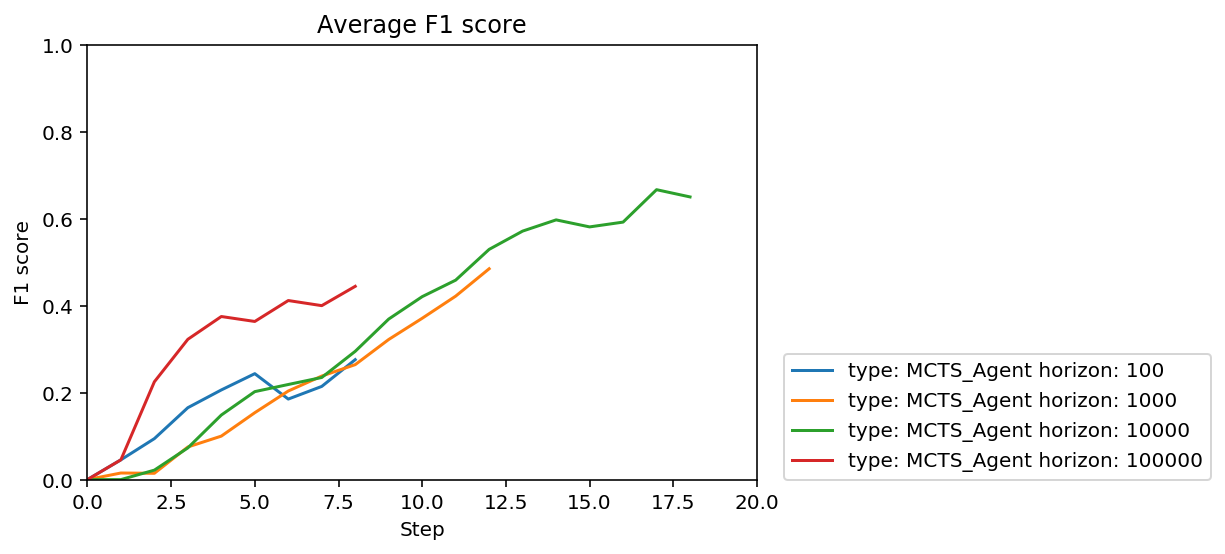

In [72]:
#plot avg F1 over time for horizon and scoring function and sparsity and scoring time for the elphant
# for horizon in ['1','2','3','4']:
#     for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
#         for sparse in ['False','True']:
for horizon in ['1','2','3','4','10','100','1000','10000','100000']:
    for scoring_function in ['random_scoring','F1score']:
        for sparse in ['False']:
            for scoring in ['Final state']:
            #     plt.clf() #clear the plot
                scores_of_scores = []
                filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                if scoring_function == 'F1score': #only run MCTS once
                    filter_MCTS = "type: MCTS_Agent horizon: "+horizon+'\Z'
                else:
                    filter_MCTS = "––––––"
#                 for row in df[df['agent'].str.contains(filter+'|'+filter_MCTS) & df['world'].str.contains(chosen_world)][['run','world','agent']].iterrows():
                for row in df[df['agent'].str.contains(filter_MCTS) & df['world'].str.contains(chosen_world)][['run','world','agent']].iterrows():
                    index, row = row
                    run,world,agent = row
                    blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                    bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                    blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                    scores =[]
                    for move in range(np.max(blockmap)): #for every move
                        _bmm = blockmap * (blockmap <= move)
                        _state = State(bw_worlds[world.split('|')[0]],_bmm)
                        score = bw.F1score(_state)
                        scores.append(score)
                    scores_of_scores.append(scores)
                #pad the lists and make np array
                try:
                    padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                    for i,j in enumerate(scores_of_scores):
                        padded[i][0:len(j)] = j
                    means = np.nanmean(padded,axis=0)
                    stds = np.nanstd(padded,axis=0)
                    plt.plot(means,label=str(agent))
                except ValueError:
                    print("None for ",filter)
            #     plt.errorbar(list(range(len(stds))),stds)
#in or outdent these to make more plots
plt.title('Average F1 score')
plt.ylabel('F1 score')
plt.xlabel('Step')
plt.xlim([0,xlim])
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()

None for  type: Agent scoring: random_scoring horizon: 1 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 1 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 2 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 2 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 3 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 3 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 4 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 4 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 10 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 10 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 100 scoring: Final state sparse\?: Fal

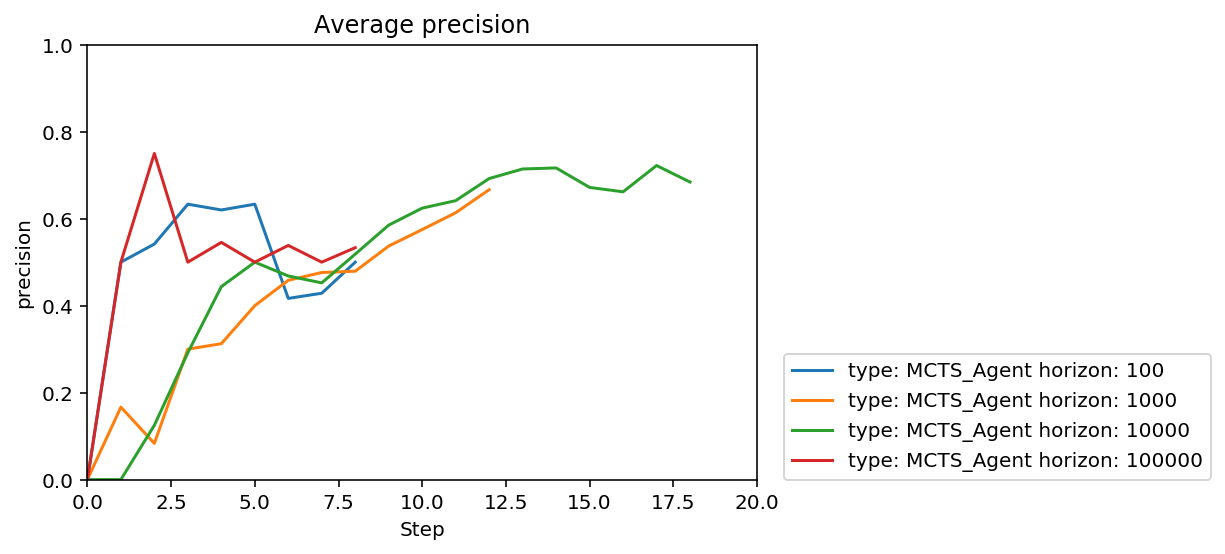

In [73]:
#plot precision over time for horizon and scoring function and sparsity and scoring time for the elphant
# for horizon in ['1','2','3','4']:
#     for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
#         for sparse in ['False','True']:
for horizon in ['1','2','3','4','10','100','1000','10000','100000']:
    for scoring_function in ['random_scoring','F1score']:
        for sparse in ['False']:
            for scoring in ['Final state']:
            #     plt.clf() #clear the plot
                scores_of_scores = []
                filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                if scoring_function == 'F1score': #only run MCTS once
                    filter_MCTS = "type: MCTS_Agent horizon: "+horizon+'\Z'
                else:
                    filter_MCTS = "––––––"
#                 for row in df[df['agent'].str.contains(filter+'|'+filter_MCTS) & df['world'].str.contains(chosen_world)][['run','world','agent']].iterrows():
                for row in df[df['agent'].str.contains(filter_MCTS) & df['world'].str.contains(chosen_world)][['run','world','agent']].iterrows():
                    index, row = row
                    run,world,agent = row
                    blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                    bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                    blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                    scores =[]
                    for move in range(np.max(blockmap)): #for every move
                        _bmm = blockmap * (blockmap <= move)
                        _state = State(bw_worlds[world.split('|')[0]],_bmm)
                        score = bw.precision(_state)
                        scores.append(score)
                    scores_of_scores.append(scores)
                #pad the lists and make np array
                try:
                    padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                    for i,j in enumerate(scores_of_scores):
                        padded[i][0:len(j)] = j
                    means = np.nanmean(padded,axis=0)
                    stds = np.nanstd(padded,axis=0)
                    plt.plot(means,label=str(agent))
                except ValueError:
                    print("None for ",filter)
            #     plt.errorbar(list(range(len(stds))),stds)
#in or outdent these to make more plots
plt.title('Average precision')
plt.ylabel('precision')
plt.xlabel('Step')
plt.xlim([0,xlim])
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()

None for  type: Agent scoring: random_scoring horizon: 1 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 1 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 2 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 2 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 3 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 3 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 4 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 4 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 10 scoring: Final state sparse\?: False
None for  type: Agent scoring: F1score horizon: 10 scoring: Final state sparse\?: False
None for  type: Agent scoring: random_scoring horizon: 100 scoring: Final state sparse\?: Fal

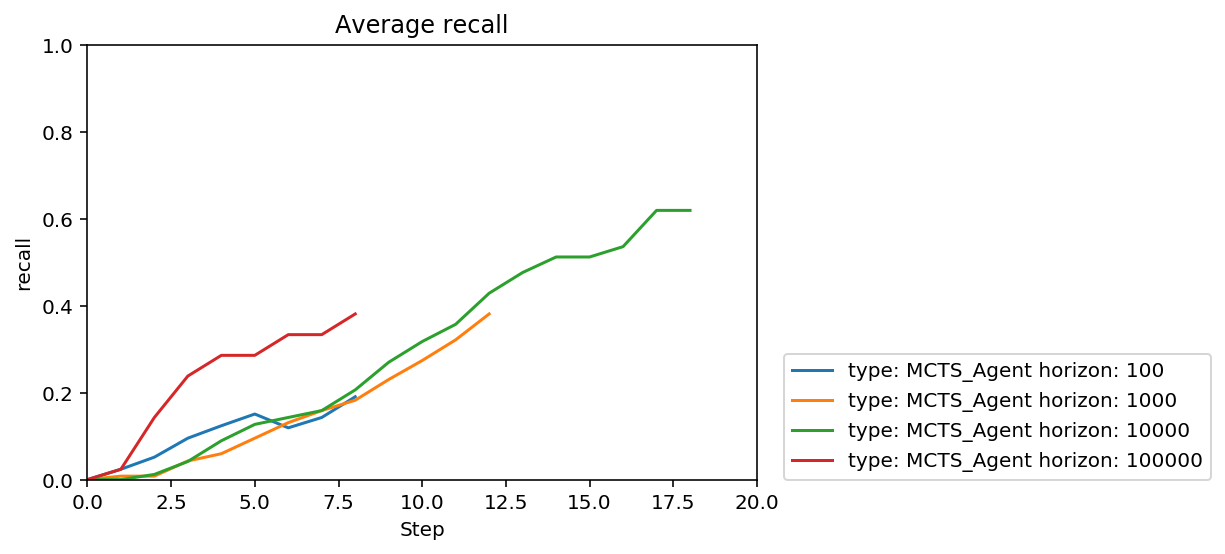

In [74]:
#plot recall over time for horizon and scoring function and sparsity and scoring time for the elphant
# for horizon in ['1','2','3','4']:
#     for scoring_function in ['silhouette_hole_score','F1score','random_scoring']:
#         for sparse in ['False','True']:
for horizon in ['1','2','3','4','10','100','1000','10000','100000']:
    for scoring_function in ['random_scoring','F1score']:
        for sparse in ['False']:
            for scoring in ['Final state']:
            #     plt.clf() #clear the plot
                scores_of_scores = []
                filter = "type: Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                if scoring_function == 'F1score': #only run MCTS once
                    filter_MCTS = "type: MCTS_Agent horizon: "+horizon+'\Z'
                else:
                    filter_MCTS = "––––––"
#                 for row in df[df['agent'].str.contains(filter+'|'+filter_MCTS) & df['world'].str.contains(chosen_world)][['run','world','agent']].iterrows():
                for row in df[df['agent'].str.contains(filter_MCTS) & df['world'].str.contains(chosen_world)][['run','world','agent']].iterrows():
                    index, row = row
                    run,world,agent = row
                    blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
                    bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
                    blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
                    scores =[]
                    for move in range(np.max(blockmap)): #for every move
                        _bmm = blockmap * (blockmap <= move)
                        _state = State(bw_worlds[world.split('|')[0]],_bmm)
                        score = bw.recall(_state)
                        scores.append(score)
                    scores_of_scores.append(scores)
                #pad the lists and make np array
                try:
                    padded = np.full([len(scores_of_scores),len(max(scores_of_scores,key = lambda x: len(x)))],np.nan)
                    for i,j in enumerate(scores_of_scores):
                        padded[i][0:len(j)] = j
                    means = np.nanmean(padded,axis=0)
                    stds = np.nanstd(padded,axis=0)
                    plt.plot(means,label=str(agent))
                except ValueError:
                    print("None for ",filter)
            #     plt.errorbar(list(range(len(stds))),stds)
#in or outdent these to make more plots
plt.title('Average recall')
plt.ylabel('recall')
plt.xlabel('Step')
plt.xlim([0,xlim])
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()

In [52]:
#wins over agent for elephant/other world
for agent in agents:
    wins = 0
    total = 0
    for o in df[(df['agent']==agent) & (df['world'].str.contains(chosen_world))]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',agent)

0 / 10 0.0% type: Agent scoring: random_scoring horizon: 1 scoring: Final state sparse?: False
0 / 10 0.0% type: Agent scoring: F1score horizon: 1 scoring: Final state sparse?: False
0 / 10 0.0% type: Agent scoring: F1score horizon: 2 scoring: Final state sparse?: False
0 / 10 0.0% type: Agent scoring: F1score horizon: 3 scoring: Final state sparse?: False
2 / 10 20.0% type: Agent scoring: silhouette_hole_score horizon: 1 scoring: Final state sparse?: False
0 / 10 0.0% type: Agent scoring: silhouette_hole_score horizon: 2 scoring: Final state sparse?: False
2 / 10 20.0% type: Agent scoring: silhouette_hole_score horizon: 3 scoring: Final state sparse?: False
0 / 10 0.0% type: Agent scoring: F1score horizon: 1 scoring: Final state sparse?: True
0 / 10 0.0% type: Agent scoring: F1score horizon: 2 scoring: Final state sparse?: True
0 / 10 0.0% type: Agent scoring: F1score horizon: 3 scoring: Final state sparse?: True
0 / 10 0.0% type: Agent scoring: silhouette_hole_score horizon: 1 scorin